In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob,os
import pandas as pd
import hddm
import kabuki

plt.style.use('seaborn-ticks')

/home/gweindel/anaconda3/envs/hddm/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Convergence behavioral models

In [2]:
MS_names = ["Exp1_JointM2", "Exp2_JointM2"]

__________________________________________________________________

Exp1_JointM2
mkdir: impossible de créer le répertoire « Exp1_JointM2 »: Le fichier existe
Plotting a(-0.5)
Plotting a(0.5)
Plotting a_std
Plotting sv
Plotting sz(-0.5)
Plotting sz(0.5)
Plotting st
Plotting z
Plotting z_std
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_mt
Plotting t_mt_std
Plotting t_SAT
Plotting t_SAT_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_SAT
Plotting v_SAT_std
Plotting v_contrast
Plotting v_contrast_std


/home/gweindel/anaconda3/envs/hddm/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting v_SAT:contrast
Plotting v_SAT:contrast_std


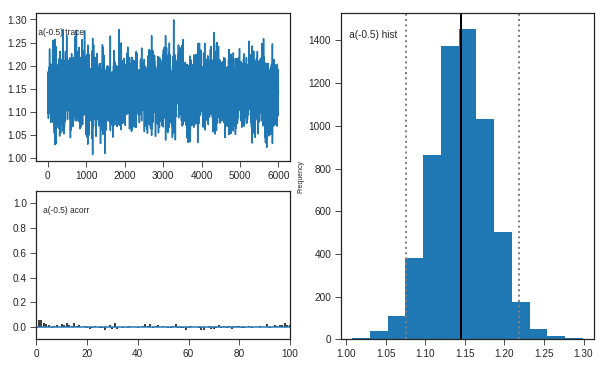

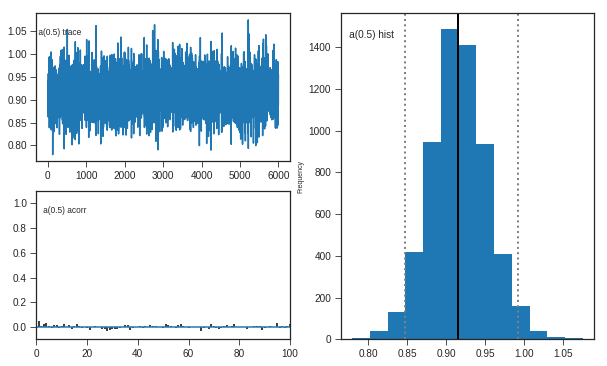

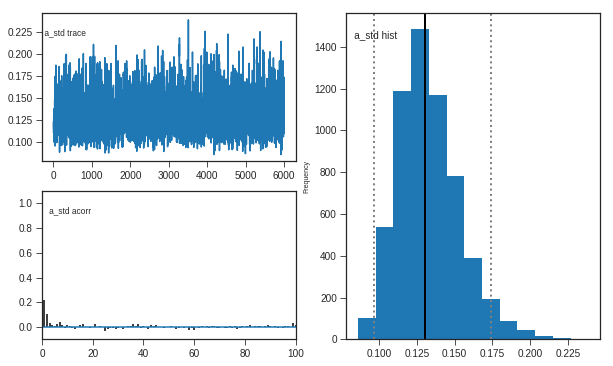

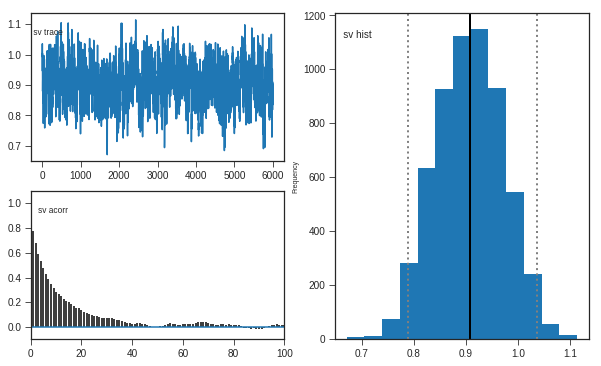

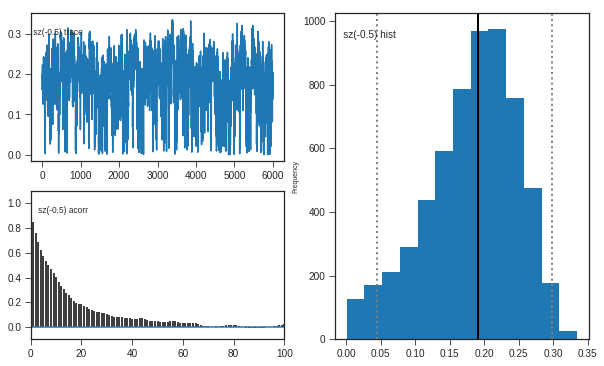

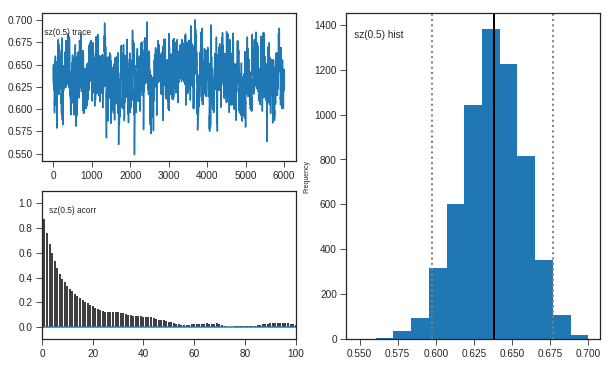

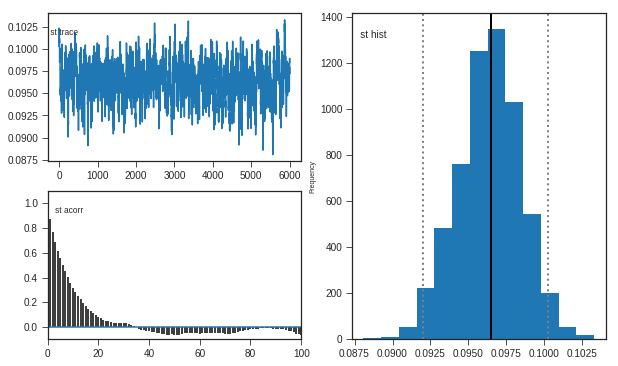

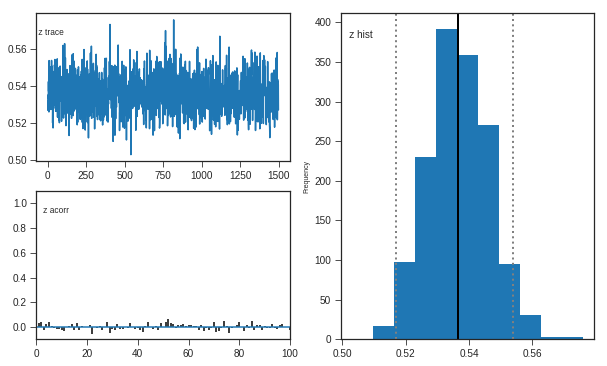

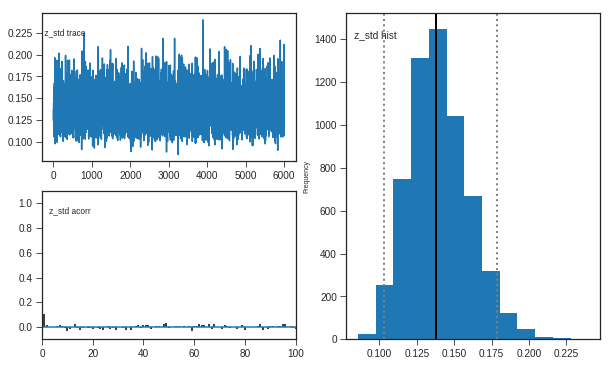

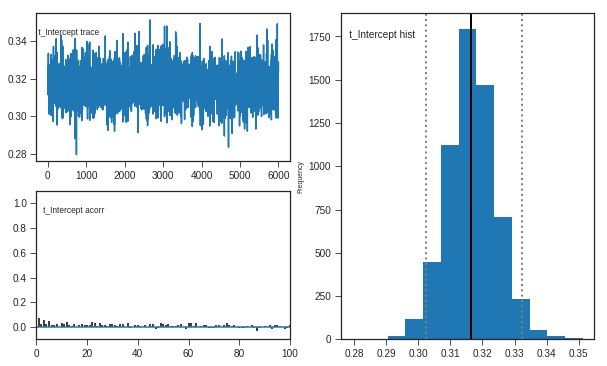

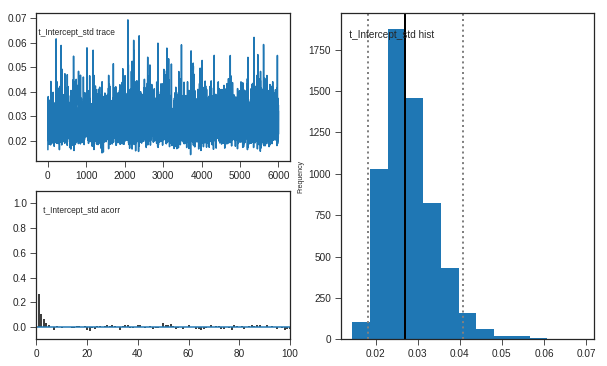

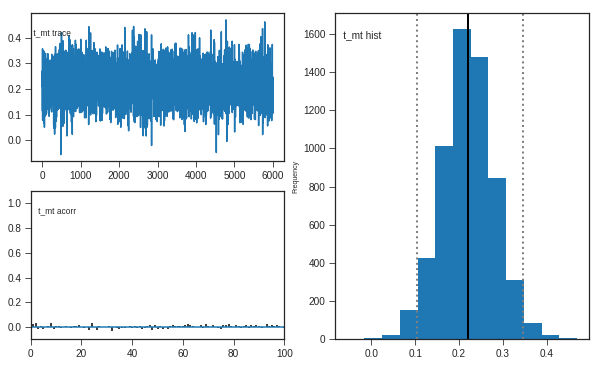

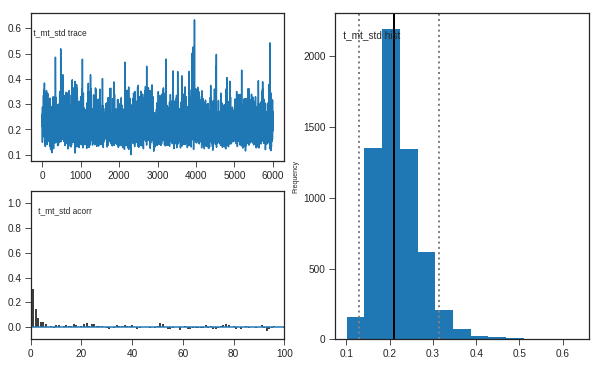

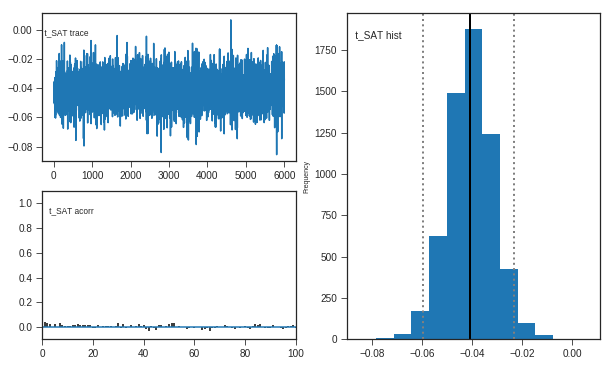

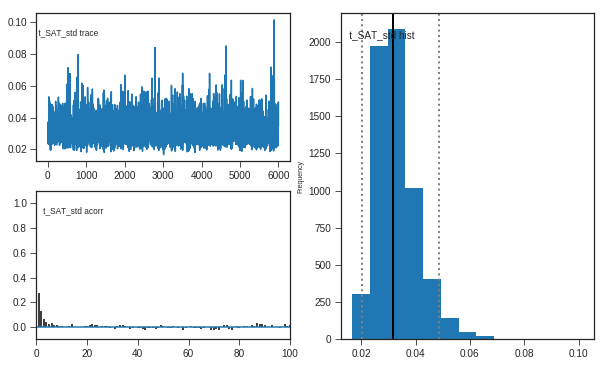

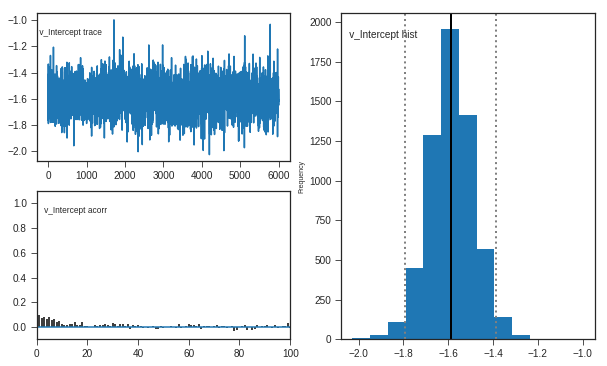

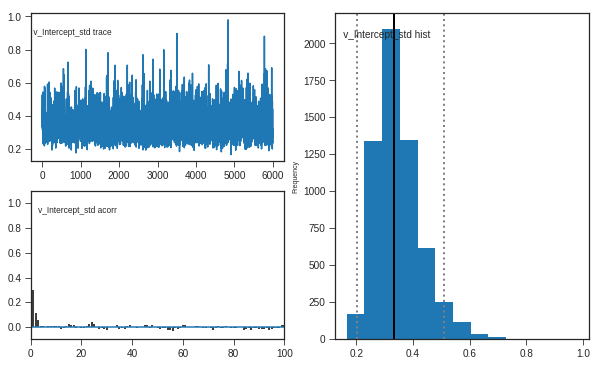

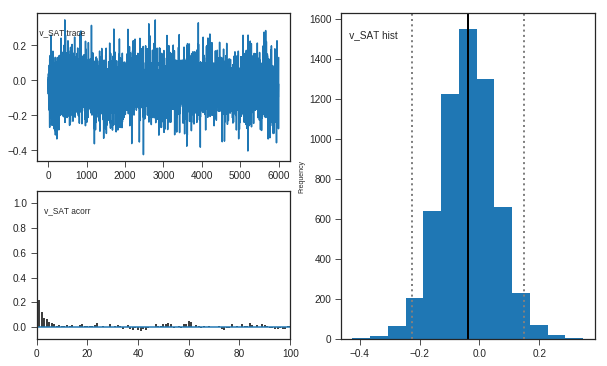

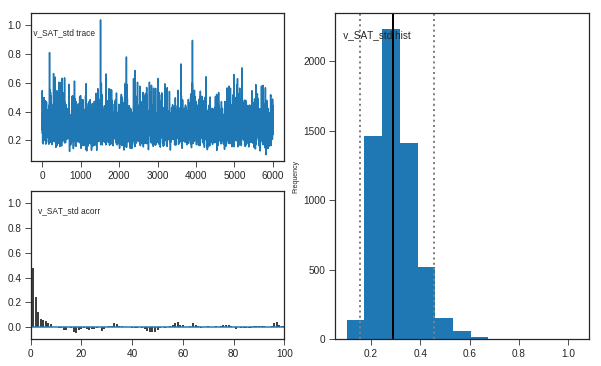

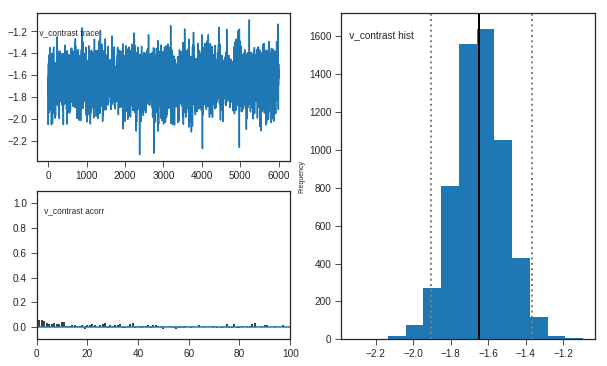

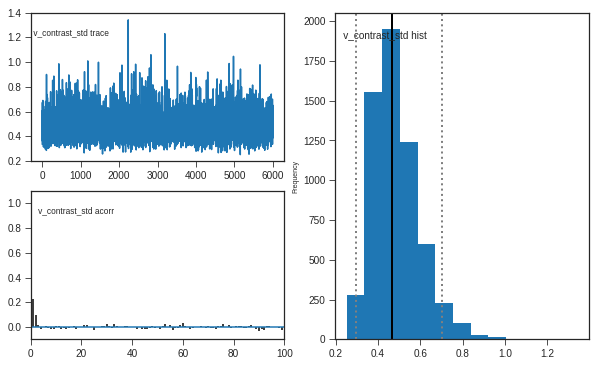

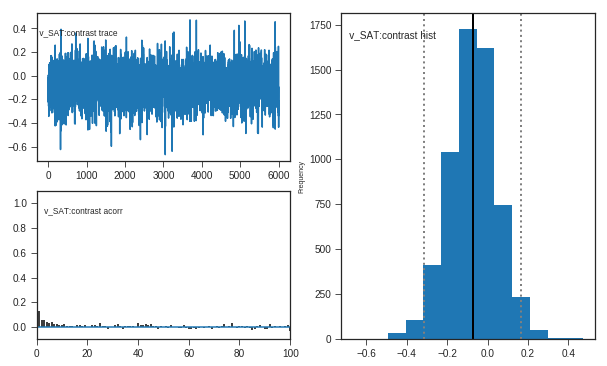

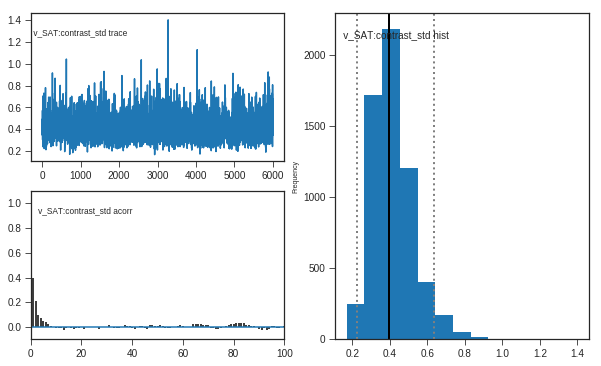

Rhat : 
1.0227043155789501
__________________________________________________________________

Exp2_JointM2
Plotting a(-0.5)
Plotting a(0.5)
Plotting a_std
Plotting sv
Plotting sz(-0.5)
Plotting sz(0.5)
Plotting st
Plotting z
Plotting z_std
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_mt
Plotting t_mt_std
Plotting t_SAT
Plotting t_SAT_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_SAT
Plotting v_SAT_std
Plotting v_contrast
Plotting v_contrast_std
Plotting v_SAT:contrast
Plotting v_SAT:contrast_std


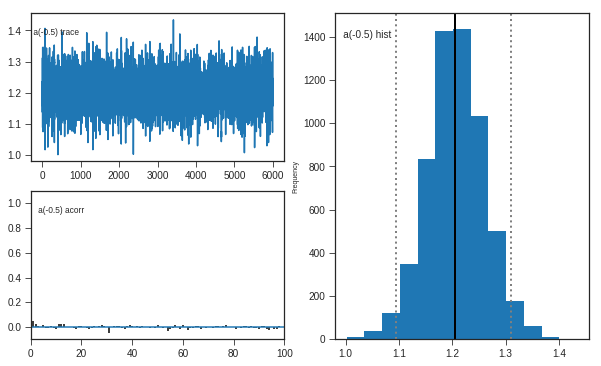

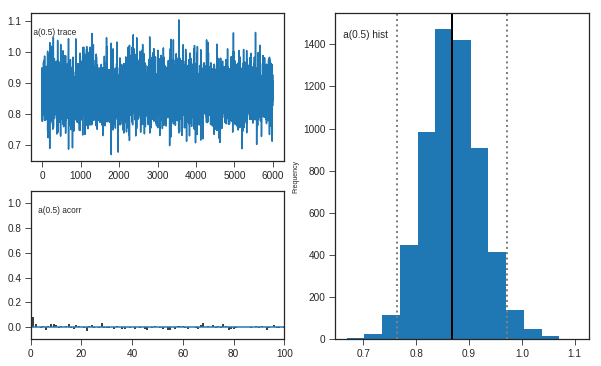

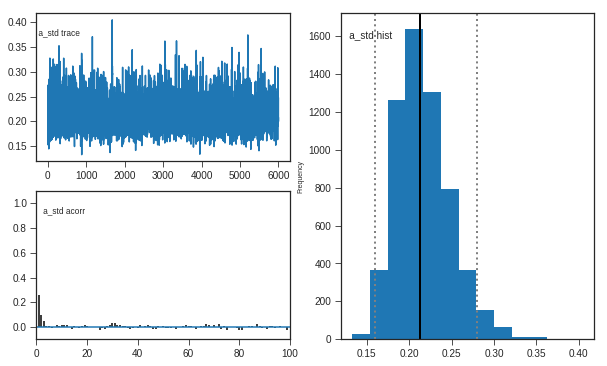

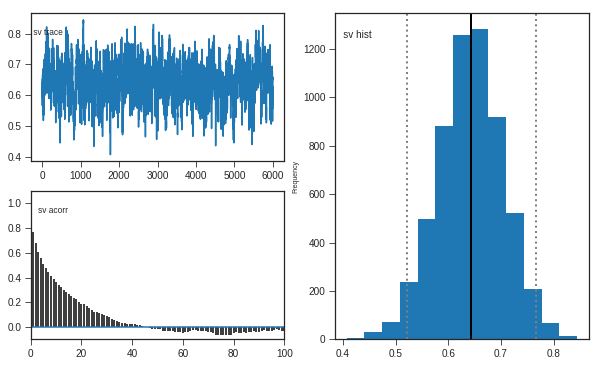

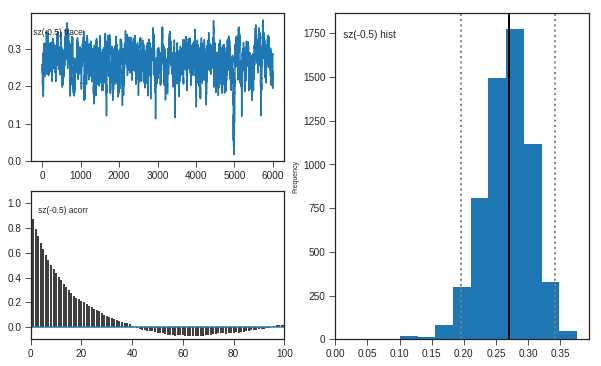

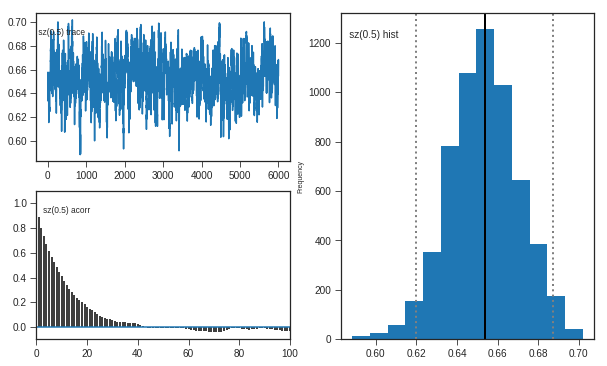

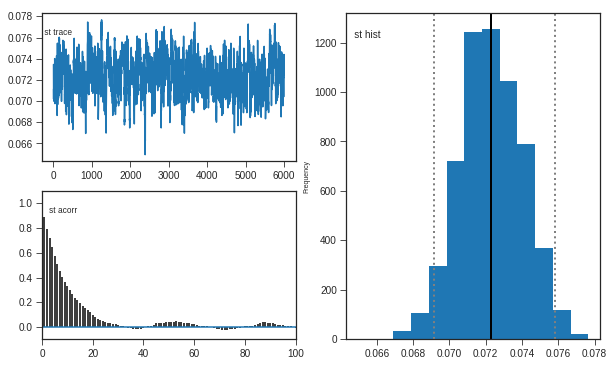

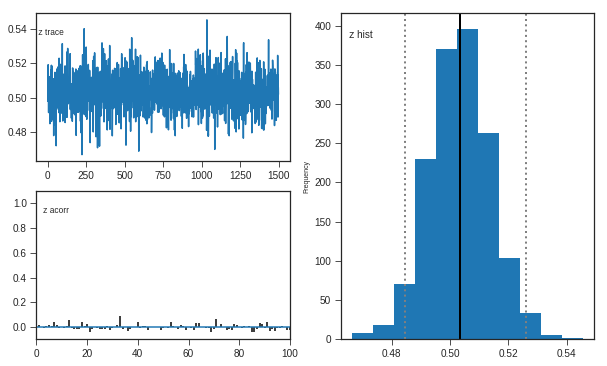

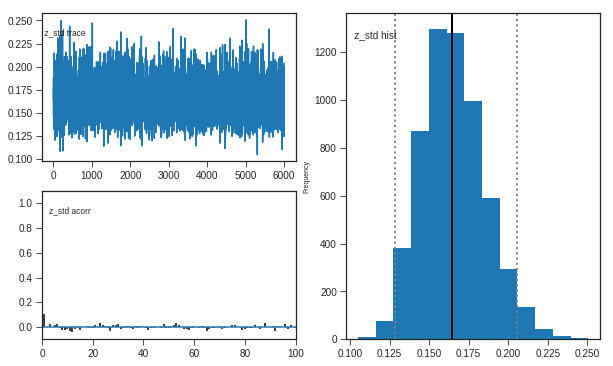

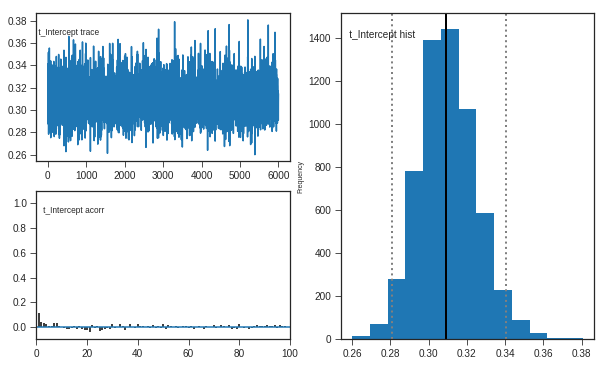

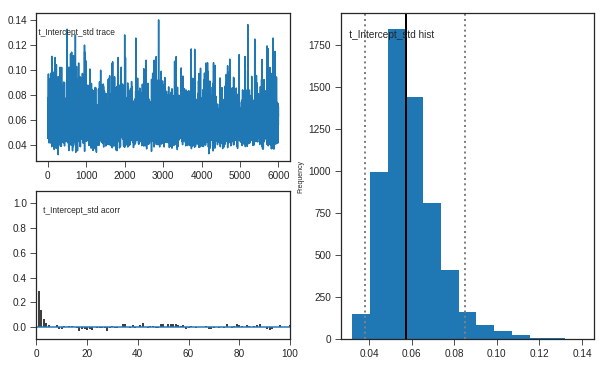

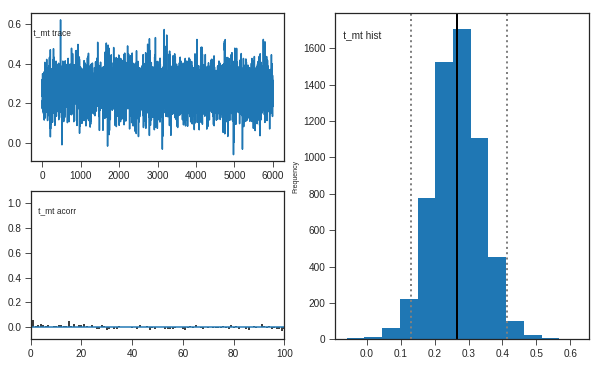

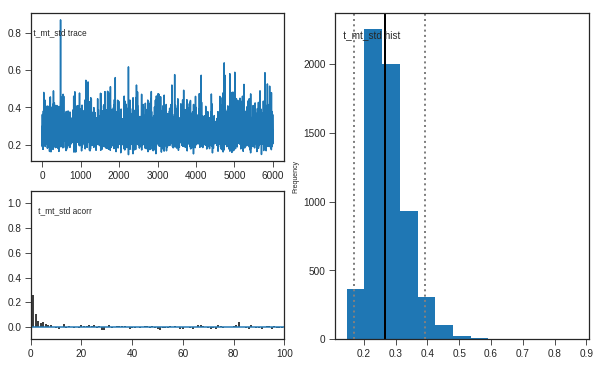

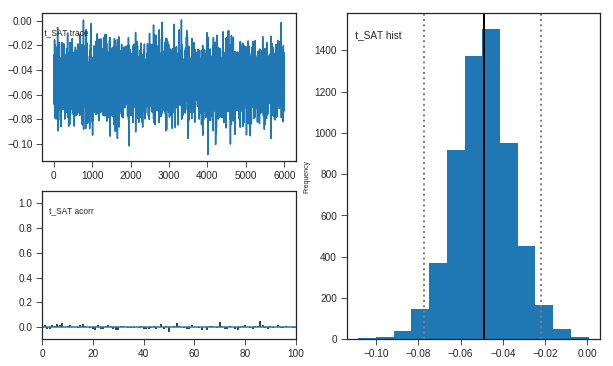

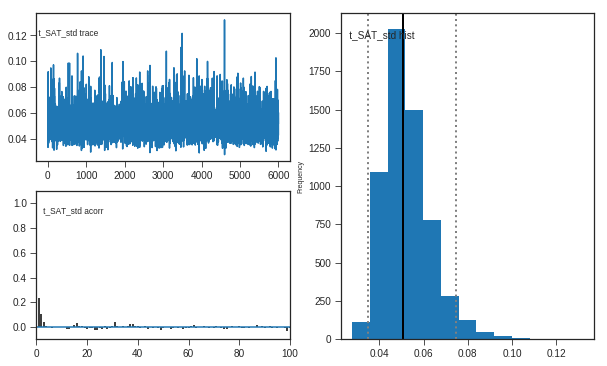

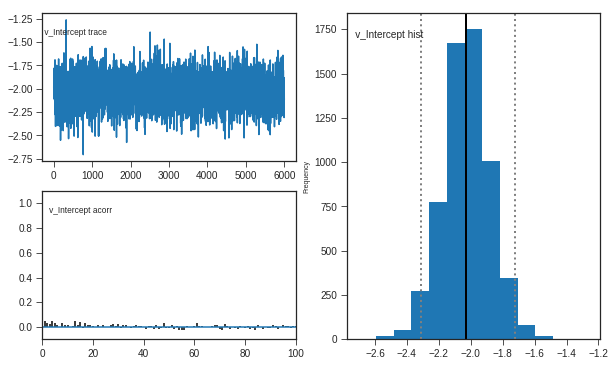

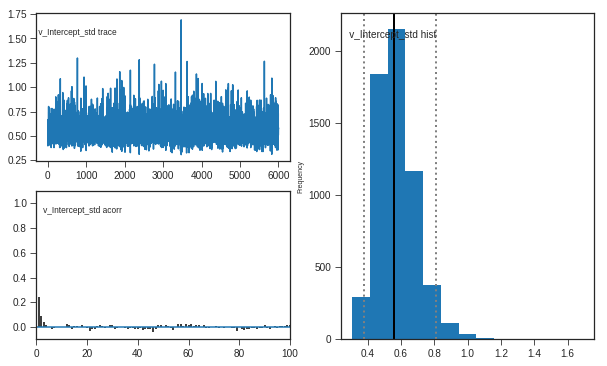

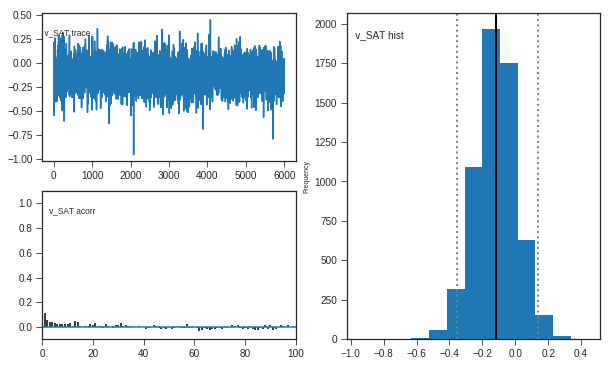

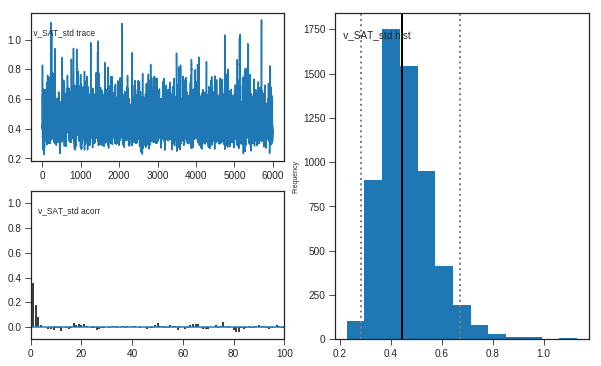

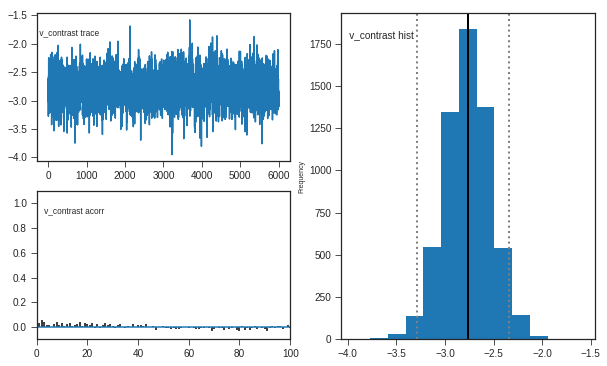

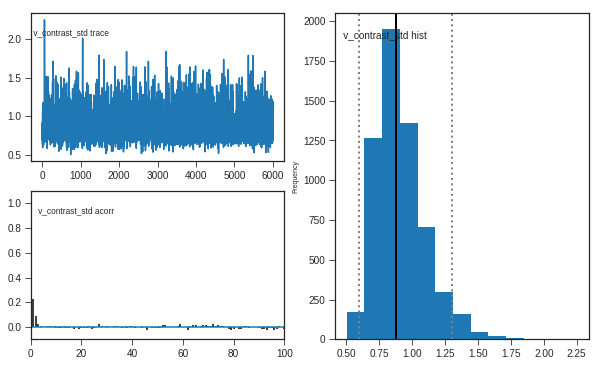

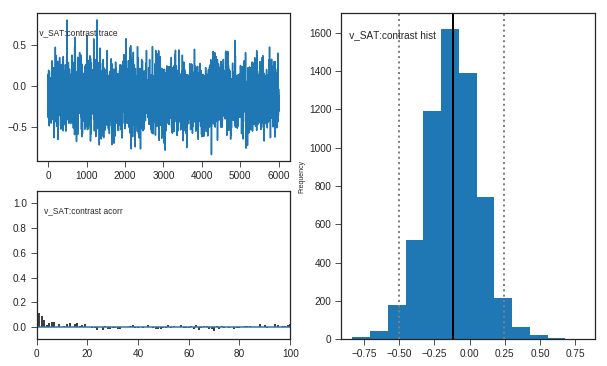

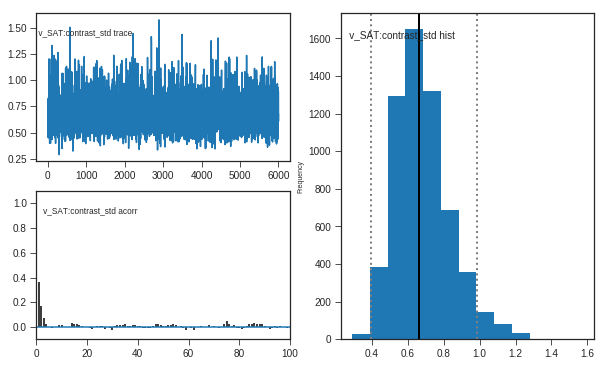

Rhat : 
1.0214078459633327


In [3]:
for name in MS_names:
    print('__________________________________________________________________\n')
    print(name)
    model = []
    os.chdir('../')
    for file in os.listdir("DDM/Fits/"):
        if name in file:
            model.append(hddm.load("DDM/Fits/%s"%file))
    rhat = kabuki.analyze.gelman_rubin(model) 
    model = kabuki.utils.concat_models(model)
    os.chdir('DDM/Diagnostic_plots/')
    ! mkdir $name
    os.chdir("%s"%name)
    g = model.plot_posteriors(save=True,  plot_subjs=False)#plot_subjs = True for subj parameters
    plt.show()
    plt.hist(rhat.values())
    plt.savefig('%s_rhat_dist.png'%name)
    plt.close()
    print('Rhat : ')
    print(np.max(rhat.values()))
    plt.close()
    os.chdir("../../")

In [4]:
os.listdir(os.curdir)

['HDDMjoint_exp1.py',
 'Fits',
 'simulated_data_exp1.csv',
 'HDDM_ModelSelection_depends_exp2.py',
 'dataHDDM.csv',
 '.ipynb_checkpoints',
 'IP_clusters_launch.txt',
 'traces',
 'simulated_data_exp2.csv',
 'HDDMdata_preparation.py',
 'DDM_Jointmodel_convergence.ipynb',
 'DDM_modelSelection_convergence.ipynb',
 'Diagnostic_plots',
 'HDDMjoint_exp2.py',
 'DDM_Jointmodel_convergence-Copy1.ipynb',
 'QPplot_exp1.png',
 'QPplot_exp2.png']